## To understand the viewship decline of a show

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
media_df=pd.read_csv('mediacompany.csv')

In [3]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


## Exploratory Data Analysis

In [4]:
media_df.shape

(80, 8)

In [156]:
media_df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,Weekend
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,80.0000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,40.5000,0.275000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,23.2379,0.449331
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,1.0000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,20.7500,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,40.5000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,60.2500,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,80.0000,1.000000


In [5]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [6]:
#unnamed:7 column as no data so dropping it
media_df=media_df.drop('Unnamed: 7',axis=1)

In [7]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [12]:
#datatype of data column is object we have to change it to datetime type
media_df['Date']=pd.to_datetime(media_df['Date'])

In [13]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [ ]:
#creating a dervied variable day to distinuish weekdays with weekends 

In [14]:
import datetime

In [75]:
date_started=datetime.date(2017,2,28)
date_started=pd.to_datetime(date_started)
show_date=media_df['Date']
media_df['Days']=show_date-date_started

In [76]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [77]:
media_df['Days']=media_df['Days'].apply(lambda x:int(str(x)[:2]))

In [78]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


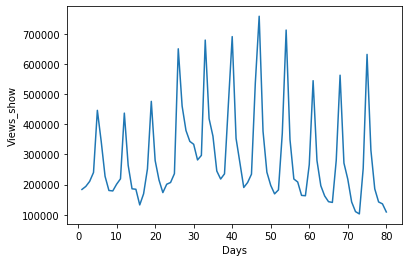

In [85]:
sns.lineplot('Days','Views_show',data=media_df)

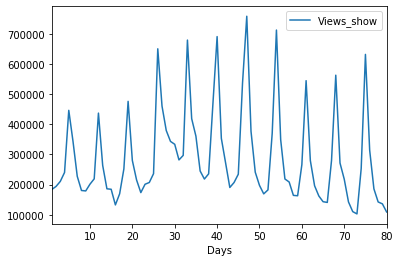

In [86]:
media_df.plot.line(x='Days',y='Views_show')

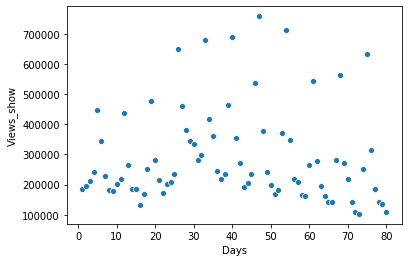

In [91]:
sns.scatterplot('Days','Views_show',data=media_df)

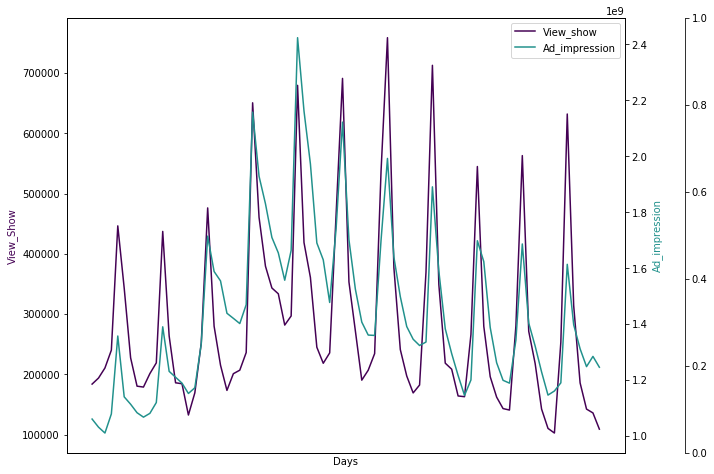

In [109]:
fig=plt.figure(figsize=(10,8))
host=fig.add_subplot(111)

par1=host.twinx()
par2=host.twinx()
host.set_xlabel('Days')
par1.set_ylabel('Ad_impression')
host.set_ylabel('View_Show')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1,=host.plot(media_df.Days,media_df.Views_show,color=color1,label='View_show')
p2,=par1.plot(media_df.Days,media_df.Ad_impression,color=color2,label='Ad_impression')
lns = [p1, p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))  
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

In [140]:
#march 1 2017 is wednesday s
def condition(x):
    if x==5 or x==6:
        return 1
    else:
        return 0
media_df['Weekend']=media_df['Date'].dt.weekday.apply(condition)

In [143]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [144]:
import statsmodels.api as sm

###  model1

In [152]:
X=media_df[['Weekend','Visitors']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model1=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [153]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           2.51e-12
Time:                        12:41:54   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model2

In [154]:
X=media_df[['Weekend','Visitors','Character_A']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model2=sm.OLS(y,X_sm).fit()

In [155]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        12:42:04   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
media_df['Lag_views']=np.roll(media_df['Views_show'],1)
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,Weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,240061


In [159]:
media_df['Lag_views'].replace(108961,0,inplace=True)

In [160]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,Weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,240061


## model3

In [161]:
X=media_df[['Weekend','Visitors','Character_A','Lag_views']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model3=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [162]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           3.16e-21
Time:                        12:49:08   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
Lag_views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#As Lag view made the visitors varaible as insignificant(might be because of correlation) we will introduce Views_platform
# As it is difficult to assume Lag View assumation of bring

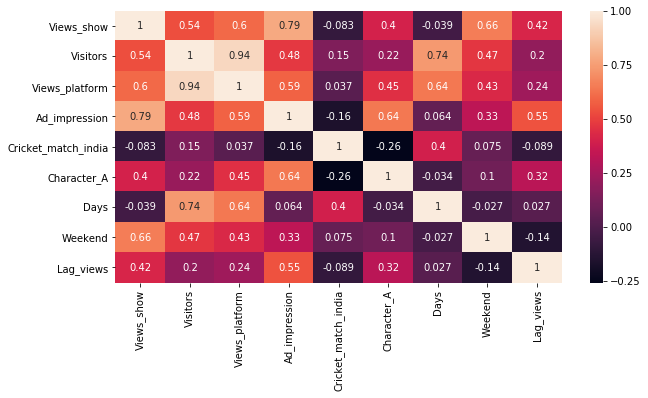

In [163]:
plt.figure(figsize=(10,5))
sns.heatmap(media_df.corr()['Weekend,'],annot=True)

## model4

In [172]:
X=media_df[['Weekend','Character_A','Views_platform']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model4=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [173]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           3.59e-15
Time:                        14:44:20   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
Weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
X=media_df[['Weekend','Character_A','Views_platform','Ad_impression']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model5=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [177]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     78.21
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           5.42e-26
Time:                        14:45:58   Log-Likelihood:                -1003.3
No. Observations:                  80   AIC:                             2017.
Df Residuals:                      75   BIC:                             2029.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.369e+05    7.4e+04     -4.552      0.000   -4.84e+05   -1.89e+05
Weekend         1.429e+05   1.99e+04      7.187      0.000    1.03e+05    1.82e+05
Character_A    -3.468e+04   2.17e+04     -1.597      0.114   -7.79e+04    8575.698
Views_platform     0.0442      0.036      1.244      0.218      -0.027       0.115
Ad_impression      0.0003    3.9e-05      8.919      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.130   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.394
Skew:                           0.544   Prob(JB):                        0.111
Kurtosis:                       3.369   Cond. No.                     1.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model6

In [178]:
X=media_df[['Weekend','Character_A','Ad_impression']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model6=sm.OLS(y,X_sm).fit()

In [179]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        14:47:05   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
media_df['Ad_impression_in_million']=media_df['Ad_impression']/1000000
#coefficient Ad_impression 0.0004 so low
#as vistors are in lakhs and ad impression are in million

## model7

In [185]:
X=media_df[['Weekend','Character_A','Ad_impression','Cricket_match_india']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model7=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [186]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.02e-25
Time:                        14:50:31   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
Weekend              1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Character_A         -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
Ad_impression           0.0004   3.71e-05      9.802      0.000       0.000       0.000
Cricket_match_india -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
X=media_df[['Weekend','Character_A','Ad_impression']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model8=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [214]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        22:48:20   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
y_predict=model8.predict(X_sm)

In [216]:
from sklearn.metrics import mean_squared_error,r2_score

In [217]:
mean_squared_error(y,y_predict)

4677651616.25347

In [218]:
r2_score(y,y_predict)

0.8026434468575623

Text(0, 0.5, 'Views')

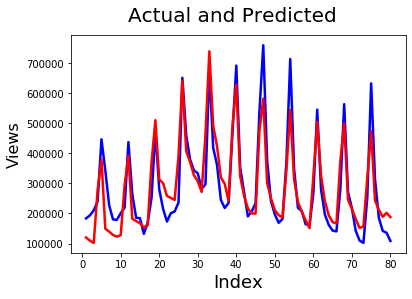

In [219]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)

Text(0, 0.5, 'Views_show-Predicted_views')

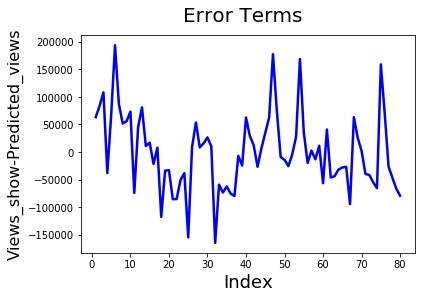

In [220]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y-y_predict,color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

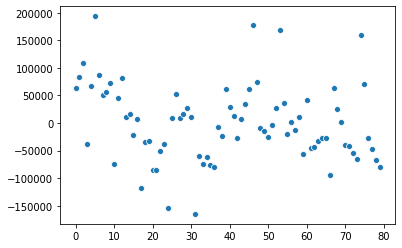

In [221]:
sns.scatterplot(range(0,len(y)),y-y_predict)

In [222]:
X=media_df[['Weekend','Character_A','Visitors']]
y=media_df['Views_show']
X_sm=sm.add_constant(X)
model_f=sm.OLS(y,X_sm).fit()

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [223]:
y_predict_6=model_f.predict(X_sm)

In [224]:
mean_squared_error(y,y_predict_6)

9815432480.451523

In [225]:
r2_score(y,y_predict_6)

0.585873408097934

Text(0, 0.5, 'Views')

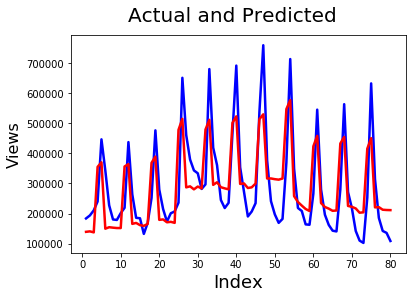

In [226]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict_6, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

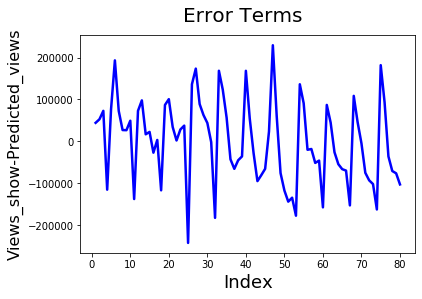

In [227]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y-y_predict_6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

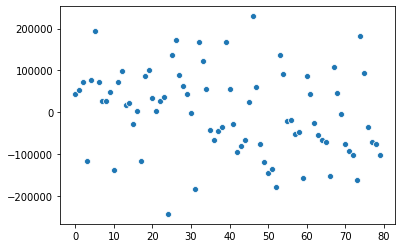

In [228]:
sns.scatterplot(range(0,len(y)),y-y_predict_6)